In [1]:
import pandas as pd

In [2]:
ad=pd.read_csv('Advertising.csv')
df=ad.copy()

In [3]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df.head(10)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [6]:
df.tail()

,TV,radio,newspaper,sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [7]:
df.dtypes

,0
TV,float64
radio,float64
newspaper,float64
sales,float64


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
df.isnull().sum()

,0
TV,0
radio,0
newspaper,0
sales,0


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [11]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [12]:
df.cov()

,TV,radio,newspaper,sales
TV,7370.949893,69.862492,105.919452,350.390195
radio,69.862492,220.427743,114.496979,44.635688
newspaper,105.919452,114.496979,474.308326,25.941392
sales,350.390195,44.635688,25.941392,27.221853


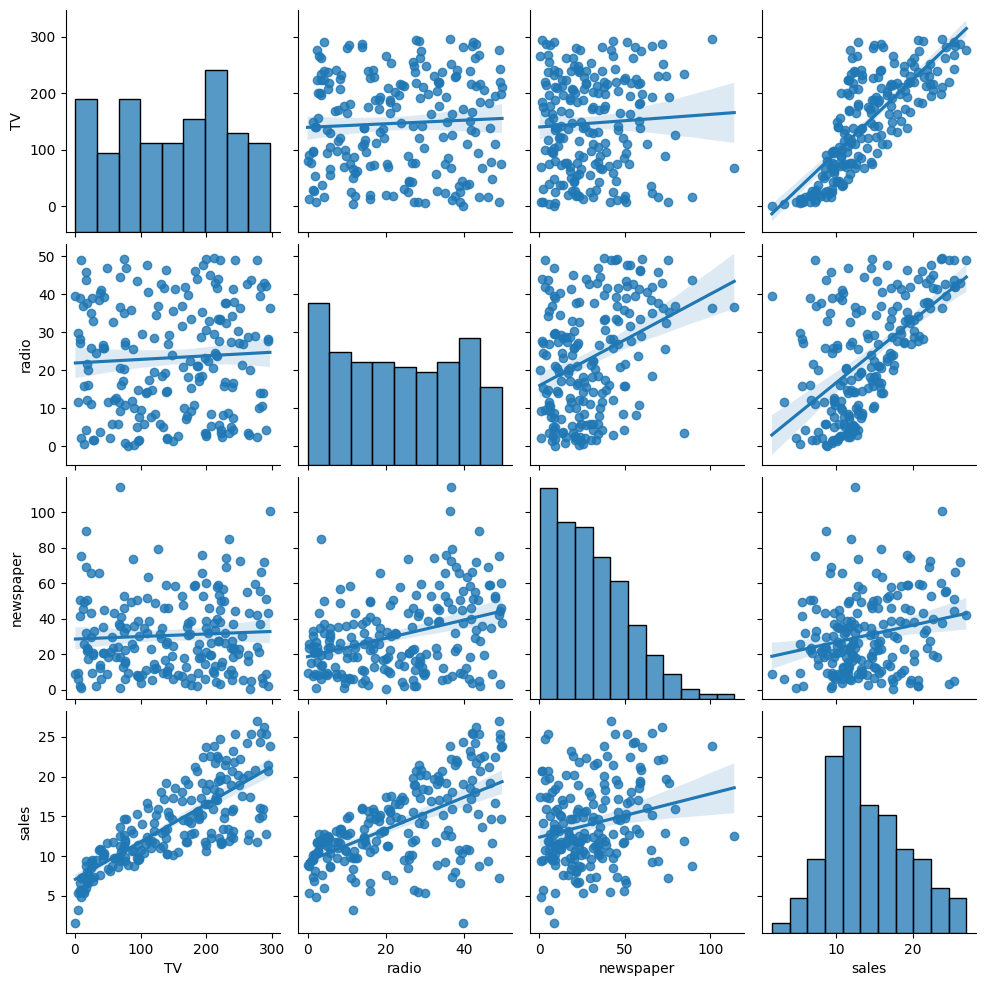

In [13]:
import seaborn as sns
sns.pairplot(df,kind="reg")

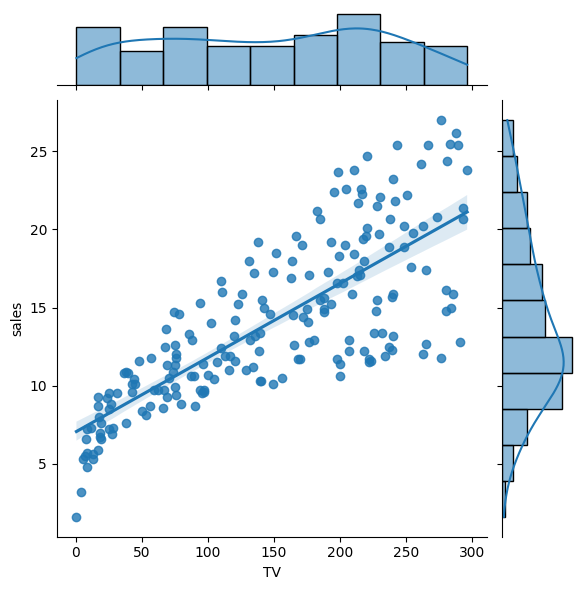

In [16]:
sns.jointplot(x="TV",y="sales",data=df,kind="reg")

Tv reklam bütçesi ile satışlar arası ilişkiyi analiz etmek için doğrusal regresyon modeli oluşturacağız.

1.Veri Hazırlık
*Tv sütunu bağımsız değişken
*Sales hedef değişken

2.Model Oluşumu ve Eğitimi
*Sckit-Learn kullanarak regresyon model eğitimi

3.Model Performans
*r2 ile model açıklama gücünü hesaplayacağız.

4.Görselleştirme
*Regresyon doğrusunu ve gerçek verilerle arasındaki bağı göstereceğiz.

In [17]:
#Kütüphanemizi import edelim
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [18]:
#Target ve Feature(bagımlı bagımsız) degiskenleri seçelim
X=df[["TV"]]
y=df[['sales']]

#Model Oluşturma ve Eğitme
model=LinearRegression()
model.fit(X,y)

#Model katsayısını seçelim
beta_1=model.coef_[0]
beta_0=model.intercept_

#Tahmin
y_pred=model.predict(X)

#R2 değerini hesaplayalım
r2=r2_score(y,y_pred)


Beta_1: [0.04753664]
Beta_0: [7.03259355]
R2: 0.611875050850071


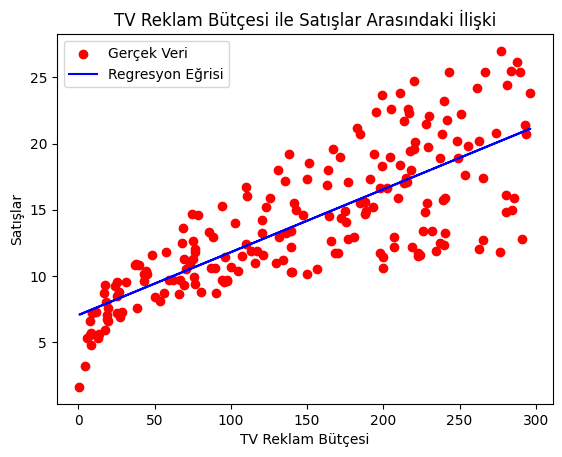

In [20]:
#Sonuçları Görselleştirme
plt.scatter(X,y,color='red',label='Gerçek Veri')
plt.plot(X,y_pred,color='blue',label='Regresyon Eğrisi')
plt.xlabel('TV Reklam Bütçesi')
plt.ylabel('Satışlar')
plt.title('TV Reklam Bütçesi ile Satışlar Arasındaki İlişki')
plt.legend()

print(f'Beta_1: {beta_1}')
print(f'Beta_0: {beta_0}')
print(f'R2: {r2}')

Regresyon Modeline Baktığımızda Şu Şekilde Yorumlanabilir:

1:Kesişim Noktası:7.032
2:Eğim:0.047

-TV reklam bütçesinde 1 birimlik artışın satışlarda 0.047 birimlik artışla ilişkili olduğunu gösterir.


R-kare(R^2):0.61
-Bu değer reklam bütçesinin satışlarda ki değişimin %61.2'sini açıkladığını ifade eder